# Kaggle 산용카드 사기 검출(Google Drive Mount)

https://www.kaggle.com/mlg-ulb/creditcardfraud

## Credit Card Fraud Detection
 - creditcard.csv (284, 807 * 31)
 - Class : 0(정상), 1(사기)
 - 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# I. Google Drive Mount

- 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

- Colab 파일 시스템에 'creditcard.csv' 파일 생성

In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


- creditcard.csv 파일 확인

In [8]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar  9 04:30 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

- pandas DataFrame

In [5]:
%%time

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
DF.head() 
# V1~28 : 카드 사용자 정보. 정보는 Standardization된 값
# Amount : 결제 금액

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- 0 (정상) Class와 1 (사기) Class 개수

In [12]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- 0 (정상) Class와 1 (사기) Class 비율

In [13]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [11]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

- X (Input), y (Output) 지정

In [12]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) Without 'stratify'

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

- Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [18]:
print('Train Data : ', '\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test Data : ', '\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train Data :  
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test Data :  
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ### (2) With 'Stratify'

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y, # 불균형 데이터의 경우 이 옵션 줘야 균등하게 Split
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

- Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [20]:
print('Train Data : ', '\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test Data : ', '\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train Data :  
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test Data :  
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. EDA

- Amount

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


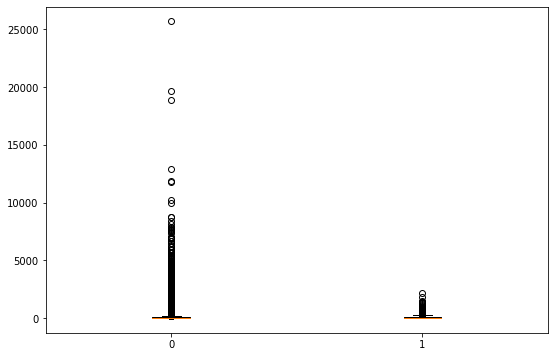

In [7]:
plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.Class == 0].Amount,
             DF[DF.Class == 1].Amount],
            labels = ['0', '1'])
plt.show()

- V15

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


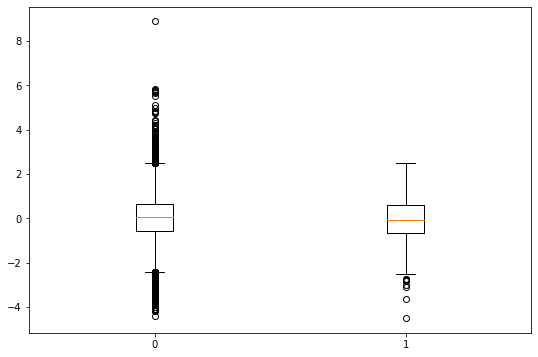

In [8]:
plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.Class == 0].V15,
             DF[DF.Class == 1].V15],
            labels = ['0', '1'])
plt.show()

- V18

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


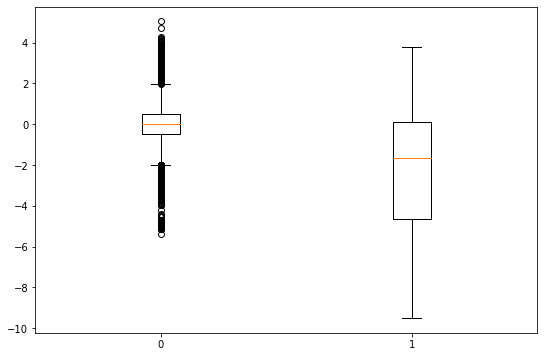

In [9]:
plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.Class == 0].V18,
             DF[DF.Class == 1].V18],
            labels = ['0', '1'])
plt.show()

# IV. Modeling

> ## 1) Logistic Regression

- 모델 생성

In [21]:
%%time

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.3,
                        penalty = 'l2',
                        multi_class = 'multinomial',
                        n_jobs = -1)

LR.fit(X_train, y_train)

CPU times: user 157 ms, sys: 80.6 ms, total: 237 ms
Wall time: 13.8 s


- 모델 평가

In [36]:
Accuracy = []
Recall = []

In [37]:
Accuracy.append(accuracy_score(y_test, LR.predict(X_test)))
Recall.append(recall_score(y_test, LR.predict(X_test)))

print(confusion_matrix(y_test, LR.predict(X_test)), '\n')
print(accuracy_score(y_test, LR.predict(X_test)), '\n')
print(recall_score(y_test, LR.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85276    19]
 [   42   106]] 

0.9992860737567735 

0.7162162162162162 

[0.9992860737567735] 

[0.7162162162162162]


> ## 2) Decision Tree Classifier

- 모델 생성

In [24]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3,
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 5.42 s, sys: 10.9 ms, total: 5.43 s
Wall time: 5.54 s


- 모델 평가

In [38]:
Accuracy.append(accuracy_score(y_test, DT.predict(X_test)))
Recall.append(recall_score(y_test, DT.predict(X_test)))

print(confusion_matrix(y_test, DT.predict(X_test)), '\n')
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(recall_score(y_test, DT.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85263    32]
 [   23   125]] 

0.9993562960102056 

0.8445945945945946 

[0.9992860737567735, 0.9993562960102056] 

[0.7162162162162162, 0.8445945945945946]


- Feature Importance

In [26]:
DT.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11587036,
       0.        , 0.        , 0.        , 0.74420998, 0.        ,
       0.01081178, 0.11641253, 0.        , 0.        , 0.        ,
       0.00792989, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00476546, 0.        ])

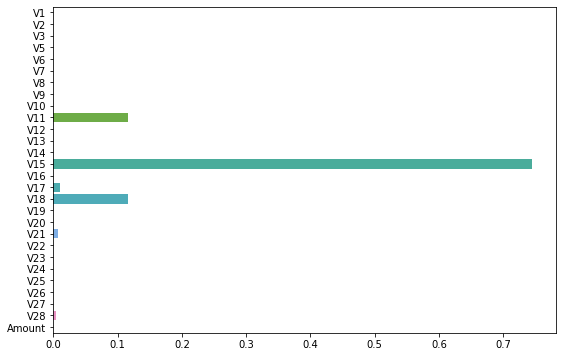

In [29]:
plt.figure(figsize = (9, 6))
sns.barplot(DT.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 3) Random Forest Classifier

- 모델 생성

In [30]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 3,
                            max_depth = 2,
                            random_state = 2045,
                            n_jobs = -1)

RF.fit(X_train, y_train)

CPU times: user 39.8 s, sys: 31.6 ms, total: 39.8 s
Wall time: 20.6 s


- 모델 평가

In [41]:
Accuracy.append(accuracy_score(y_test, RF.predict(X_test)))
Recall.append(recall_score(y_test, RF.predict(X_test)))

print(confusion_matrix(y_test, RF.predict(X_test)), '\n')
print(accuracy_score(y_test, RF.predict(X_test)), '\n')
print(recall_score(y_test, RF.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85280    15]
 [   66    82]] 

0.9990519995786665 

0.5540540540540541 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541]


- Feature Importance

In [42]:
RF.feature_importances_

array([8.87562569e-03, 2.32188263e-02, 5.21013531e-02, 1.97844875e-02,
       1.90212349e-02, 1.54655097e-02, 2.92399946e-02, 1.26914982e-03,
       3.24167367e-02, 9.04867370e-02, 9.47536643e-02, 9.77715146e-02,
       3.05045459e-04, 1.42072378e-01, 1.85313755e-04, 3.69477932e-02,
       2.19223444e-01, 7.32798918e-02, 1.45007186e-03, 4.21638201e-03,
       1.41831337e-02, 3.65076383e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.19347451e-03, 1.24013379e-02, 9.39523150e-03,
       3.76591855e-04])

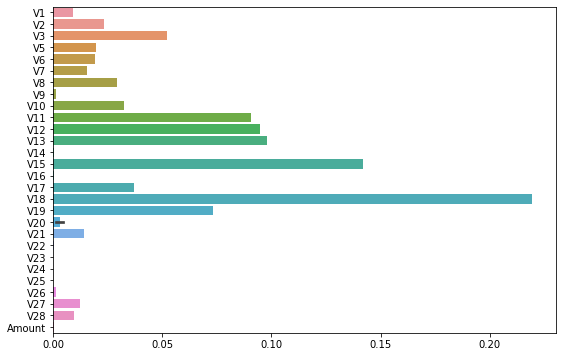

In [44]:
plt.figure(figsize = (9, 6))
sns.barplot(RF.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 4) Gradient Boosting Machine(GBM) Classifier

- 모델 생성

In [45]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 500,
                                 learning_rate = 0.01,
                                 max_features = 3,
                                 max_depth = 3)

GBC.fit(X_train, y_train)

CPU times: user 3min 29s, sys: 336 ms, total: 3min 29s
Wall time: 3min 30s


- 모델 평가

In [46]:
Accuracy.append(accuracy_score(y_test, GBC.predict(X_test)))
Recall.append(recall_score(y_test, GBC.predict(X_test)))

print(confusion_matrix(y_test, GBC.predict(X_test)), '\n')
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(recall_score(y_test, GBC.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85285    10]
 [   31   117]] 

0.9995201479348805 

0.7905405405405406 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665, 0.9995201479348805] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541, 0.7905405405405406]


- Feature Importance

In [47]:
GBC.feature_importances_

array([0.01529046, 0.01237941, 0.01827353, 0.03623524, 0.00655628,
       0.00996429, 0.03238486, 0.00768256, 0.03879662, 0.09911227,
       0.06216815, 0.13110123, 0.00152776, 0.1850762 , 0.00486304,
       0.07405569, 0.17331329, 0.02022541, 0.00537201, 0.00938907,
       0.0192356 , 0.00088766, 0.00154152, 0.00228679, 0.00191008,
       0.00645927, 0.00900473, 0.00927398, 0.00563302])

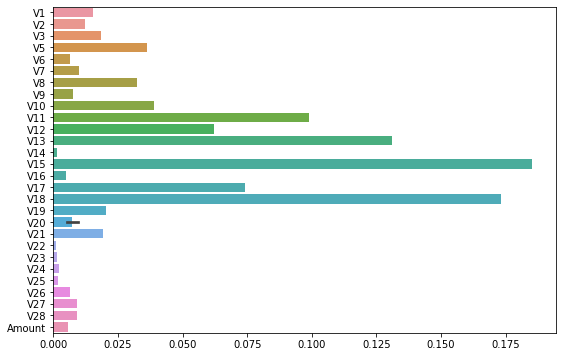

In [48]:
plt.figure(figsize = (9, 6))
sns.barplot(GBC.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 5) Adaptive Boosting Classifier

- 모델 생성

In [49]:
%%time

from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 0.001,
                         random_state = 2045)

ABC.fit(X_train, y_train)

CPU times: user 23min 36s, sys: 1.57 s, total: 23min 37s
Wall time: 23min 45s


- 모델 평가

In [50]:
Accuracy.append(accuracy_score(y_test, ABC.predict(X_test)))
Recall.append(recall_score(y_test, ABC.predict(X_test)))

print(confusion_matrix(y_test, ABC.predict(X_test)), '\n')
print(accuracy_score(y_test, ABC.predict(X_test)), '\n')
print(recall_score(y_test, ABC.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85280    15]
 [   55    93]] 

0.9991807403766253 

0.6283783783783784 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665, 0.9995201479348805, 0.9991807403766253] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541, 0.7905405405405406, 0.6283783783783784]


- Feature Importance

In [51]:
ABC.feature_importances_

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.194, 0.   , 0.03 , 0.   , 0.544, 0.   , 0.   , 0.232, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

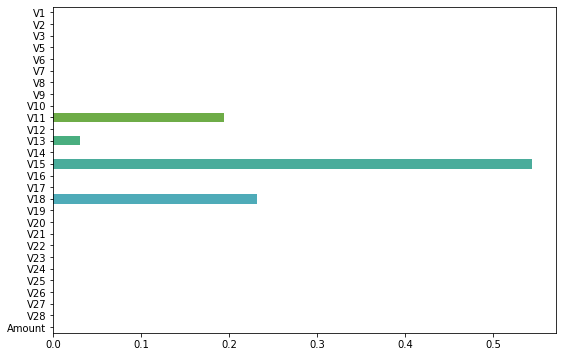

In [52]:
plt.figure(figsize = (9, 6))
sns.barplot(ABC.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 6) eXtra Gradient Boost(XGBoost) Classifier

- 모델 생성

In [53]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster = 'gbtree',
                    n_estimators = 500,
                    learning_rate = 0.5,
                    reg_lambda = 0.05,
                    n_jobs = -1)

XGB.fit(X_train, y_train)

CPU times: user 4min 22s, sys: 304 ms, total: 4min 22s
Wall time: 2min 14s


- 모델 평가

In [54]:
Accuracy.append(accuracy_score(y_test, XGB.predict(X_test)))
Recall.append(recall_score(y_test, XGB.predict(X_test)))

print(confusion_matrix(y_test, XGB.predict(X_test)), '\n')
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')
print(recall_score(y_test, XGB.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85284    11]
 [   27   121]] 

0.9995552590615966 

0.8175675675675675 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665, 0.9995201479348805, 0.9991807403766253, 0.9995552590615966] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541, 0.7905405405405406, 0.6283783783783784, 0.8175675675675675]


- Feature Importance

In [55]:
XGB.feature_importances_

array([0.0110731 , 0.01504567, 0.02821299, 0.03934133, 0.01598039,
       0.01388204, 0.0365582 , 0.01622606, 0.01673837, 0.06729109,
       0.01402102, 0.03336236, 0.01737413, 0.13288063, 0.01372348,
       0.01259053, 0.31719914, 0.01315761, 0.02218837, 0.01967221,
       0.0181551 , 0.00711117, 0.0087218 , 0.01174997, 0.01219601,
       0.0302898 , 0.01939285, 0.01707941, 0.0187852 ], dtype=float32)

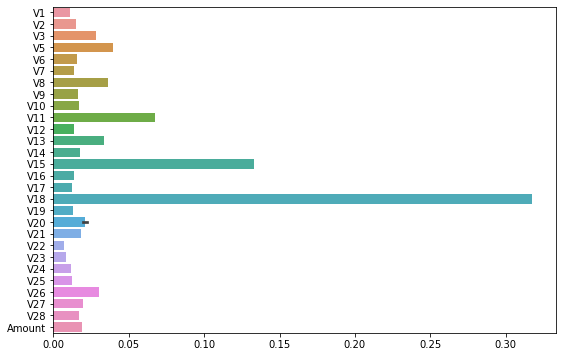

In [56]:
plt.figure(figsize = (9, 6))
sns.barplot(XGB.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 7) LightGBM Classifier

- 모델 생성

In [57]:
%%time

from lightgbm import LGBMClassifier

LGB = LGBMClassifier(n_estimators = 500,
                     max_depth = 3,
                     learning_rate = 0.5,
                     reg_lambda = 0.2,
                     n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 24.6 s, sys: 122 ms, total: 24.7 s
Wall time: 13.4 s


- 모델 평가

In [58]:
Accuracy.append(accuracy_score(y_test, LGB.predict(X_test)))
Recall.append(recall_score(y_test, LGB.predict(X_test)))

print(confusion_matrix(y_test, LGB.predict(X_test)), '\n')
print(accuracy_score(y_test, LGB.predict(X_test)), '\n')
print(recall_score(y_test, LGB.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85267    28]
 [   39   109]] 

0.9992158515033414 

0.7364864864864865 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665, 0.9995201479348805, 0.9991807403766253, 0.9995552590615966, 0.9992158515033414] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541, 0.7905405405405406, 0.6283783783783784, 0.8175675675675675, 0.7364864864864865]


- Feature Importance

In [59]:
LGB.feature_importances_

array([130,  82,  92, 147,  95, 119, 106, 142,  90, 136, 104, 112, 155,
       156, 122, 100,  93, 153,  78,  94, 111, 140,  93, 140, 110, 101,
       138, 105, 106])

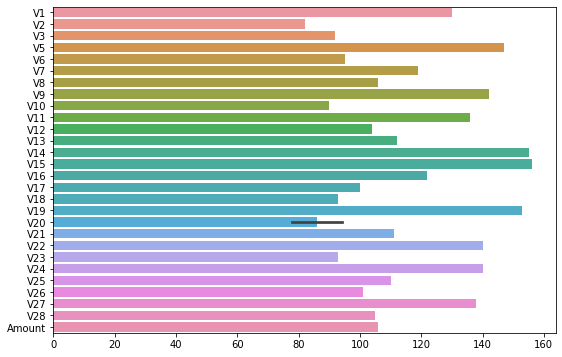

In [60]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
             'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V20', 'V21',
             'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
plt.show()

> ## 8) K-Nearest Neighbors Classifier

- 모델 생성

In [61]:
%%time

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5,
                           n_jobs = -1)

KNN.fit(X_train, y_train)

CPU times: user 2.08 s, sys: 15.1 ms, total: 2.09 s
Wall time: 2.13 s


- 모델 평가

In [62]:
Accuracy.append(accuracy_score(y_test, KNN.predict(X_test)))
Recall.append(recall_score(y_test, KNN.predict(X_test)))

print(confusion_matrix(y_test, KNN.predict(X_test)), '\n')
print(accuracy_score(y_test, KNN.predict(X_test)), '\n')
print(recall_score(y_test, KNN.predict(X_test)), '\n')
print(Accuracy, '\n')
print(Recall)

[[85284    11]
 [   47   101]] 

0.9993211848834895 

0.6824324324324325 

[0.9992860737567735, 0.9993562960102056, 0.9990519995786665, 0.9995201479348805, 0.9991807403766253, 0.9995552590615966, 0.9992158515033414, 0.9993211848834895] 

[0.7162162162162162, 0.8445945945945946, 0.5540540540540541, 0.7905405405405406, 0.6283783783783784, 0.8175675675675675, 0.7364864864864865, 0.6824324324324325]


# V. 최종 비교

> ## 1) Accuracy

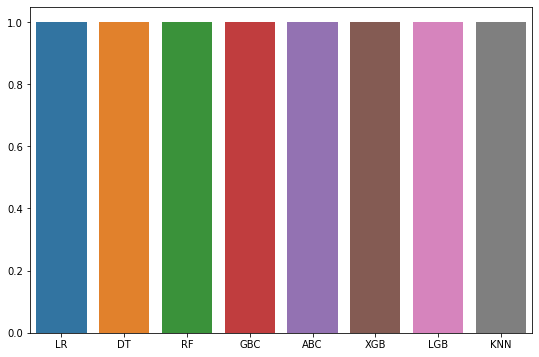

In [63]:
plt.figure(figsize = (9, 6))
x = ['LR', 'DT', 'RF', 'GBC', 'ABC', 'XGB', 'LGB', 'KNN']
y = Accuracy
sns.barplot(x = x, y = y)

> ## 2) Recall

- Recall 비교

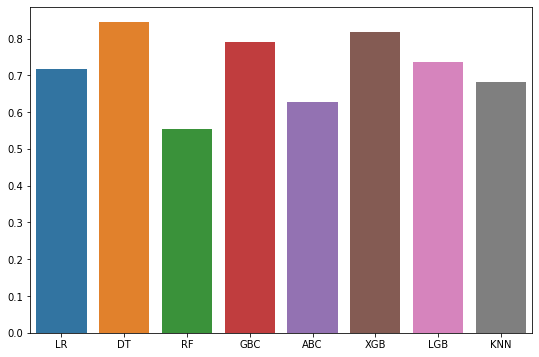

In [64]:
plt.figure(figsize = (9, 6))
x = ['LR', 'DT', 'RF', 'GBC', 'ABC', 'XGB', 'LGB', 'KNN']
y = Recall
sns.barplot(x = x, y = y)

- 가장 높은 Recall

In [65]:
print(max(Recall))

0.8445945945945946


# VI. 추가

> ## 1) Decision Tree Classifier Without max_depth

In [66]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy',
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 13.3 s, sys: 16 ms, total: 13.3 s
Wall time: 13.3 s


In [67]:
print(confusion_matrix(y_test, KNN.predict(X_test)), '\n')
print(accuracy_score(y_test, KNN.predict(X_test)), '\n')
print(recall_score(y_test, KNN.predict(X_test)), '\n')  # max_depth 없애면 recall score 내려감

[[85284    11]
 [   47   101]] 

0.9993211848834895 

0.6824324324324325 



> ## 2) ABC With learning_rate = 0.01

In [14]:
%%time

from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 0.01,  # learning_rate 높여도 시간은 비슷
                         random_state = 2045)

ABC.fit(X_train, y_train)

CPU times: user 23min 54s, sys: 2.04 s, total: 23min 56s
Wall time: 24min 3s


In [17]:
print(confusion_matrix(y_test, ABC.predict(X_test)), '\n')
print(accuracy_score(y_test, ABC.predict(X_test)), '\n')
print(recall_score(y_test, ABC.predict(X_test)), '\n')  # recall 향상

[[85278    17]
 [   43   105]] 

0.9992977774656788 

0.7094594594594594 

